In [1]:
# Predicting rainfall - yes / no (boolean values)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Ensure inline plotting if using Jupyter Notebook
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score

In [3]:
import pandas as pd

# 1978 to 2022
file_path = "modified_location_0.xlsx"

# Read the Excel file
data = pd.read_excel(file_path)

# Display the first few rows of the data
print(data.head())

        Date    Day  Year  Month Location  Rainfall (in mm)  Latitude  \
0 1901-01-01  Day_1  1901      1    Loc_0               3.0     27.25   
1 1901-01-02  Day_2  1901      1    Loc_0               8.0     27.25   
2 1901-01-03  Day_3  1901      1    Loc_0               0.0     27.25   
3 1901-01-04  Day_4  1901      1    Loc_0               0.0     27.25   
4 1901-01-05  Day_5  1901      1    Loc_0               0.0     27.25   

   Longitude  Quarter  Cumulative_Rainfall  Previous_Day_Rainfall  Weekly Sum  \
0      88.25        1                  3.0                    0.0         3.0   
1      88.25        1                 11.0                    3.0        11.0   
2      88.25        1                 11.0                    8.0        11.0   
3      88.25        1                  8.0                    0.0        11.0   
4      88.25        1                  0.0                    0.0        11.0   

   Weekly_Average hasRainfall Landslide_possibility  Season  
0        3.0

In [4]:
data.shape

(61600, 16)

In [5]:
print(data.columns)

Index(['Date', 'Day', 'Year', 'Month', 'Location', 'Rainfall (in mm)',
       'Latitude', 'Longitude', 'Quarter', 'Cumulative_Rainfall',
       'Previous_Day_Rainfall', 'Weekly Sum', 'Weekly_Average', 'hasRainfall',
       'Landslide_possibility', 'Season'],
      dtype='object')


In [6]:
data.head()

# divided in classes - 1 for rainfall, 0 for no rainfall

,Date,Day,Year,Month,Location,Rainfall (in mm),Latitude,Longitude,Quarter,Cumulative_Rainfall,Previous_Day_Rainfall,Weekly Sum,Weekly_Average,hasRainfall,Landslide_possibility,Season
0,1901-01-01,Day_1,1901,1,Loc_0,3.0,27.25,88.25,1,3.0,0.0,3.0,3.000000,yes,no,Winter
1,1901-01-02,Day_2,1901,1,Loc_0,8.0,27.25,88.25,1,11.0,3.0,11.0,5.500000,yes,no,Winter
2,1901-01-03,Day_3,1901,1,Loc_0,0.0,27.25,88.25,1,11.0,8.0,11.0,3.666667,no,no,Winter
3,1901-01-04,Day_4,1901,1,Loc_0,0.0,27.25,88.25,1,8.0,0.0,11.0,2.750000,no,no,Winter
4,1901-01-05,Day_5,1901,1,Loc_0,0.0,27.25,88.25,1,0.0,0.0,11.0,2.200000,no,no,Winter


In [7]:
data['hasRainfall'].value_counts()

hasRainfall
yes    32508
no     29092
Name: count, dtype: int64

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61600 entries, 0 to 61599
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Date                   61600 non-null  datetime64[ns]
 1   Day                    61600 non-null  object        
 2   Year                   61600 non-null  int64         
 3   Month                  61600 non-null  int64         
 4   Location               61600 non-null  object        
 5   Rainfall (in mm)       61600 non-null  float64       
 6   Latitude               61600 non-null  float64       
 7   Longitude              61600 non-null  float64       
 8   Quarter                61600 non-null  int64         
 9   Cumulative_Rainfall    61600 non-null  float64       
 10  Previous_Day_Rainfall  61600 non-null  float64       
 11  Weekly Sum             61600 non-null  float64       
 12  Weekly_Average         61600 non-null  float64       
 13  h

In [9]:
data['Day_of_Week'] = data['Date'].dt.dayofweek  # Day of the week (0=Monday, 6=Sunday)
data['Day_of_Year'] = data['Date'].dt.dayofyear  # Day of the year (1-365/366) 

In [10]:
print(data.columns)

Index(['Date', 'Day', 'Year', 'Month', 'Location', 'Rainfall (in mm)',
       'Latitude', 'Longitude', 'Quarter', 'Cumulative_Rainfall',
       'Previous_Day_Rainfall', 'Weekly Sum', 'Weekly_Average', 'hasRainfall',
       'Landslide_possibility', 'Season', 'Day_of_Week', 'Day_of_Year'],
      dtype='object')


In [11]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
data['Season'] = label_encoder.fit_transform(data['Season'])

In [12]:
X = data.drop(['Landslide_possibility','Location','hasRainfall','Quarter','Date','Day','Rainfall (in mm)'] , axis = 1)
y = data['hasRainfall']
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.4 , random_state = 1)

In [13]:
print(X.columns)

Index(['Year', 'Month', 'Latitude', 'Longitude', 'Cumulative_Rainfall',
       'Previous_Day_Rainfall', 'Weekly Sum', 'Weekly_Average', 'Season',
       'Day_of_Week', 'Day_of_Year'],
      dtype='object')


In [14]:
# LOGISTIC REGRESSION

In [15]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train , y_train)

C:\Users\apoor\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [16]:
y_pred = model.predict(X_test)

In [17]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8616883116883117
Classification Report:
               precision    recall  f1-score   support

          no       0.81      0.92      0.86     11588
         yes       0.92      0.81      0.86     13052

    accuracy                           0.86     24640
   macro avg       0.87      0.87      0.86     24640
weighted avg       0.87      0.86      0.86     24640



In [18]:
# SUPPORT VECTOR CLASSIFIER

In [19]:
from sklearn.linear_model import SGDClassifier
# changed from SVC() then LinearSVC()
model = SGDClassifier(loss="hinge")  # Hinge loss is used for SVM
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.621387987012987
Classification Report:
               precision    recall  f1-score   support

          no       0.55      0.99      0.71     11588
         yes       0.98      0.29      0.45     13052

    accuracy                           0.62     24640
   macro avg       0.77      0.64      0.58     24640
weighted avg       0.78      0.62      0.57     24640



In [20]:
# RANDOM FOREST CLASSIFIER

In [21]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9089285714285714
Classification Report:
               precision    recall  f1-score   support

          no       0.93      0.87      0.90     11588
         yes       0.89      0.94      0.92     13052

    accuracy                           0.91     24640
   macro avg       0.91      0.91      0.91     24640
weighted avg       0.91      0.91      0.91     24640



In [22]:
new = data[data['Location'] == 0]
new.head()

,Date,Day,Year,Month,Location,Rainfall (in mm),Latitude,Longitude,Quarter,Cumulative_Rainfall,Previous_Day_Rainfall,Weekly Sum,Weekly_Average,hasRainfall,Landslide_possibility,Season,Day_of_Week,Day_of_Year


In [23]:
new.shape

(0, 18)

In [24]:
monthly_location_rainfall = data.groupby(['Month','Location'])['Rainfall (in mm)'].sum().reset_index()
monthly_location_rainfall

,Month,Location,Rainfall (in mm)
0,1,Loc_0,2643.0
1,2,Loc_0,4857.2
2,3,Loc_0,11063.2
3,4,Loc_0,25295.4
4,5,Loc_0,40444.6
5,6,Loc_0,79342.0
6,7,Loc_0,103968.6
7,8,Loc_0,81654.0
8,9,Loc_0,60395.8
9,10,Loc_0,19349.0


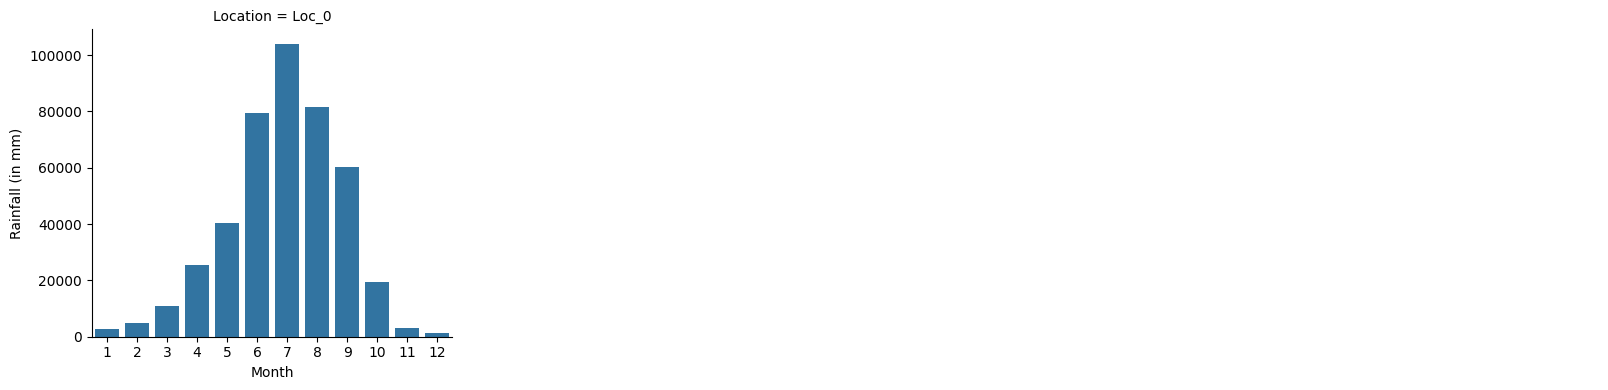

In [25]:
# g = sns.FacetGrid(data = monthly_location_rainfall , col="Location", col_wrap=4, height=4)
# g.map(sns.barplot , 'Month' , 'Rainfall (in mm)',order=range(1, 13))

sns.catplot(
    data=monthly_location_rainfall,
    kind="bar",
    x="Month",
    y="Rainfall (in mm)",
    col="Location",
    col_wrap=4,
    order=range(1, 13),
    height=4
)